In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from lazygrad import MLP
%matplotlib inline

### Dataset 

[link for the data](https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction?resource=download)

In [3]:
df_x = pd.read_csv("data/x.csv", sep=";")
print(df_x.shape)
df_x.head()

(414, 6)


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,-0.823683,1.255628,-0.792495,2.007407,1.125430,0.448762
1,-0.823683,0.157086,-0.616612,1.667503,0.912444,0.401139
2,1.541151,-0.387791,-0.414015,0.307885,1.486860,0.688183
3,1.246435,-0.387791,-0.414015,0.307885,1.486860,0.688183
4,-1.121951,-1.117223,-0.549997,0.307885,0.834188,0.592937


In [6]:
# convert pandas dataframe to numpy
xs = df_x.to_numpy()
print(xs.shape)

(414, 6)


In [7]:
df_y = pd.read_csv("data/y.csv", sep=";")
y = df_y.to_numpy().squeeze()
print(y.shape)

(414,)


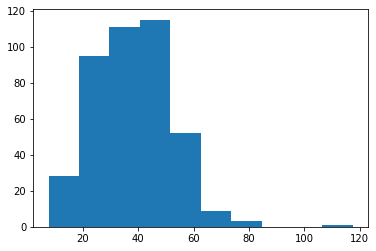

In [8]:
plt.hist(y)
plt.show()

### Model


In [9]:
model = MLP(6, [16, 1]) # 1-layer neural network
print(model)
print("number of parameters", len(model.parameters()))

MLP of [Layer of [ReLUNeuron(6), ReLUNeuron(6), ReLUNeuron(6), ReLUNeuron(6), ReLUNeuron(6), ReLUNeuron(6), ReLUNeuron(6), ReLUNeuron(6), ReLUNeuron(6), ReLUNeuron(6), ReLUNeuron(6), ReLUNeuron(6), ReLUNeuron(6), ReLUNeuron(6), ReLUNeuron(6), ReLUNeuron(6)], Layer of [LinearNeuron(16)]]
number of parameters 129


In [15]:
# training loop 
for k in range(50):
    for i in range(len(xs)):
        output = model(xs[i])
        target = y[i]
        loss = ((output - target) ** 2)
        loss.backward()
        for p in model.parameters():
            p.data += -0.001 * p.grad 
        model.zero_grad()
    if k%5 == 0:
        print(k, loss)

0 Value(data=183.36081342500984, grad=1)
5 Value(data=184.77059452296402, grad=1)
10 Value(data=182.5588778459099, grad=1)
15 Value(data=188.77271607601483, grad=1)
20 Value(data=181.03737422844063, grad=1)
25 Value(data=178.42077486468804, grad=1)
30 Value(data=179.33399024454968, grad=1)
35 Value(data=176.36618809965913, grad=1)
40 Value(data=177.2519418142925, grad=1)
45 Value(data=168.94310389875213, grad=1)


### Predict on "virtual" new obs.

In [19]:
index = 1
output = model(xs[index])
target = y[index]
print(f'output: {output.data}', f'target: {target}')

output: 43.38667161044621 target: 42.2
